In [1]:
import iris
import iris.coord_categorisation
import calendar
import numpy as np
import cartopy.util
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
from copy import copy
plt.rcParams['mathtext.default'] = 'regular'

In [2]:
# Read data
path_to_rono2_emis = Path.cwd().parent / 'data' / 'rono2_emis'
meono2_oc = iris.load_cube(str(path_to_rono2_emis / 'perpetual_meono2_oceanic_emissions.nc'))
etono2_oc = iris.load_cube(str(path_to_rono2_emis / 'perpetual_etono2_oceanic_emissions.nc'))
nprono2_oc = iris.load_cube(str(path_to_rono2_emis / 'perpetual_nprono2_oceanic_emissions.nc'))
iprono2_oc = iris.load_cube(str(path_to_rono2_emis / 'perpetual_iprono2_oceanic_emissions.nc'))
meono2_bb = iris.load_cube(str(path_to_rono2_emis / 'perpetual_meono2_biomass_burning_emissions.nc'))
etono2_bb = iris.load_cube(str(path_to_rono2_emis / 'perpetual_etono2_biomass_burning_emissions.nc'))
nprono2_bb = iris.load_cube(str(path_to_rono2_emis / 'perpetual_nprono2_biomass_burning_emissions.nc'))
iprono2_bb = iris.load_cube(str(path_to_rono2_emis / 'perpetual_iprono2_biomass_burning_emissions.nc'))
# Path to figures
path_to_figs = Path.cwd().parent.parent.parent / 'results' / 'rono2_emis'
publish = True
if publish:
    mpl.rcParams['xtick.labelsize'] = 12
    mpl.rcParams['ytick.labelsize'] = 12
    mpl.rcParams['axes.titlesize'] = 12
    mpl.rcParams['axes.labelsize'] = 12
    plt.rcParams['font.size'] = 12

In [3]:
# Add up oceanic and biomass burning emissions
meono2_oc_plus_bb = meono2_oc + meono2_bb
etono2_oc_plus_bb = etono2_oc + etono2_bb
nprono2_oc_plus_bb = nprono2_oc + nprono2_bb
iprono2_oc_plus_bb = iprono2_oc + iprono2_bb
meono2_oc_plus_bb.rename('sum_of_methyl_nitrate_oceanic_and_biomass_burning_emissions')
etono2_oc_plus_bb.rename('sum_of_ethyl_nitrate_oceanic_and_biomass_burning_emissions')
nprono2_oc_plus_bb.rename('sum_of_npropyl_nitrate_oceanic_and_biomass_burning_emissions')
iprono2_oc_plus_bb.rename('sum_of_ipropyl_nitrate_oceanic_and_biomass_burning_emissions')

In [4]:
# Save iris cubes to .nc
iris.save(meono2_oc_plus_bb, str(path_to_rono2_emis / 'perpetual_meono2_sum_of_oceanic_and_biomass_burning_emissions.nc'))
iris.save(etono2_oc_plus_bb, str(path_to_rono2_emis / 'perpetual_etono2_sum_of_oceanic_and_biomass_burning_emissions.nc'))
iris.save(nprono2_oc_plus_bb, str(path_to_rono2_emis / 'perpetual_nprono2_sum_of_oceanic_and_biomass_burning_emissions.nc'))
iris.save(iprono2_oc_plus_bb, str(path_to_rono2_emis / 'perpetual_iprono2_sum_of_oceanic_and_biomass_burning_emissions.nc'))

#### Plot figures

In [14]:
lats = meono2_oc.coord('latitude').points

In [15]:
# Select the first 12 months
meono2 = meono2_oc_plus_bb[0:12,...]
etono2 = etono2_oc_plus_bb[0:12,...]
nprono2 = nprono2_oc_plus_bb[0:12,...]
iprono2 = iprono2_oc_plus_bb[0:12,...]
# Add a season coordinate
iris.coord_categorisation.add_season(meono2, 'time', name='season')
iris.coord_categorisation.add_season(etono2, 'time', name='season')
iris.coord_categorisation.add_season(nprono2, 'time', name='season')
iris.coord_categorisation.add_season(iprono2, 'time', name='season')

In [16]:
# Annual sum
meono2_ann, lons = cartopy.util.add_cyclic_point(meono2.collapsed('time', iris.analysis.SUM).data, coord=meono2.coord('longitude').points)
etono2_ann = cartopy.util.add_cyclic_point(etono2.collapsed('time', iris.analysis.SUM).data)
nprono2_ann = cartopy.util.add_cyclic_point(nprono2.collapsed('time', iris.analysis.SUM).data)
iprono2_ann = cartopy.util.add_cyclic_point(iprono2.collapsed('time', iris.analysis.SUM).data)
# Mask zero emissions
mskd_meono2_ann = np.ma.masked_where(meono2_ann.data<=0.00000000e+00, meono2_ann.data)
mskd_etono2_ann = np.ma.masked_where(etono2_ann.data<=0.00000000e+00, etono2_ann.data)
mskd_nprono2_ann = np.ma.masked_where(nprono2_ann.data<=0.00000000e+00, nprono2_ann.data)
mskd_iprono2_ann = np.ma.masked_where(iprono2_ann.data<=0.00000000e+00, iprono2_ann.data)
# Find max annual emission
ann_max = max(meono2_ann.max(), etono2_ann.max(), nprono2_ann.max(), iprono2_ann.max())

/local/mwe14avu/miniconda3/lib/python3.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/local/mwe14avu/miniconda3/lib/python3.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/local/mwe14avu/miniconda3/lib/python3.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/local/mwe14avu/miniconda3/lib/python3.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


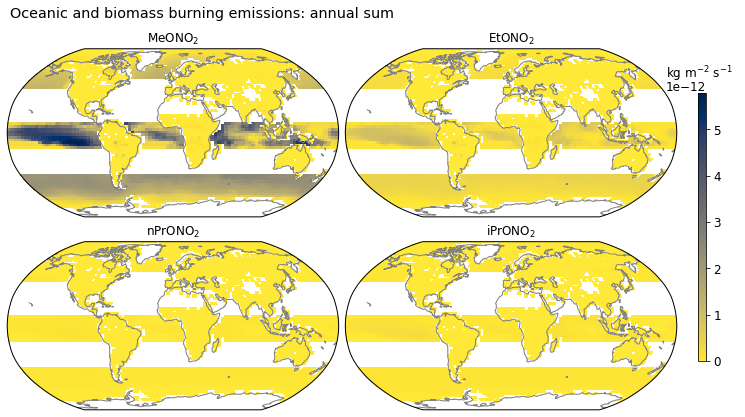

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0)))
# Hide zero emissions
cmap_hide = copy(plt.cm.cividis_r)
cmap_hide.set_bad('w', 0)
p00 = ax[0,0].pcolormesh(lons, lats, mskd_meono2_ann, transform=ccrs.PlateCarree(), vmin=0, vmax=ann_max, cmap=cmap_hide);
ax[0,1].pcolormesh(lons, lats, mskd_etono2_ann, transform=ccrs.PlateCarree(), vmin=0, vmax=ann_max, cmap=cmap_hide);
ax[1,0].pcolormesh(lons, lats, mskd_nprono2_ann, transform=ccrs.PlateCarree(), vmin=0, vmax=ann_max, cmap=cmap_hide);
ax[1,1].pcolormesh(lons, lats, mskd_iprono2_ann, transform=ccrs.PlateCarree(), vmin=0, vmax=ann_max, cmap=cmap_hide);
# common
ax[0,0].set_title('$MeONO_2$')
ax[0,1].set_title('$EtONO_2$')
ax[1,0].set_title('$nPrONO_2$')
ax[1,1].set_title('$iPrONO_2$')
for iax in ax.flatten(): iax.coastlines(color='grey') 
cax = fig.add_axes([0.925, 0.35, 0.009, 0.31])
cb00 = fig.colorbar(p00, cax=cax, orientation='vertical')
cb00.ax.set_title('kg $m^{-2}$ $s^{-1}$  ', pad=15);
fig.suptitle('Oceanic and biomass burning emissions: annual sum', x=0.35, y=0.76)#, weight='bold')
fig.subplots_adjust(hspace=-0.58, wspace=0.02)
fig.savefig(path_to_figs / f'rono2_oc_bb_emis_ann.png', bbox_inches='tight', dpi=300)

In [23]:
# Seasonal sum
meono2_ssn = cartopy.util.add_cyclic_point(meono2.aggregated_by(['season'], iris.analysis.SUM).data)
etono2_ssn = cartopy.util.add_cyclic_point(etono2.aggregated_by(['season'], iris.analysis.SUM).data)
nprono2_ssn = cartopy.util.add_cyclic_point(nprono2.aggregated_by(['season'], iris.analysis.SUM).data)
iprono2_ssn = cartopy.util.add_cyclic_point(iprono2.aggregated_by(['season'], iris.analysis.SUM).data)
# Mask zero emissions
mskd_meono2_ssn = np.ma.masked_where(meono2_ssn.data<=0.00000000e+00, meono2_ssn.data)
mskd_etono2_ssn = np.ma.masked_where(etono2_ssn.data<=0.00000000e+00, etono2_ssn.data)
mskd_nprono2_ssn = np.ma.masked_where(nprono2_ssn.data<=0.00000000e+00, nprono2_ssn.data)
mskd_iprono2_ssn = np.ma.masked_where(iprono2_ssn.data<=0.00000000e+00, iprono2_ssn.data)
# Find max ssnual emission
ssn_max = max(meono2_ssn.max(), etono2_ssn.max(), nprono2_ssn.max(), iprono2_ssn.max())

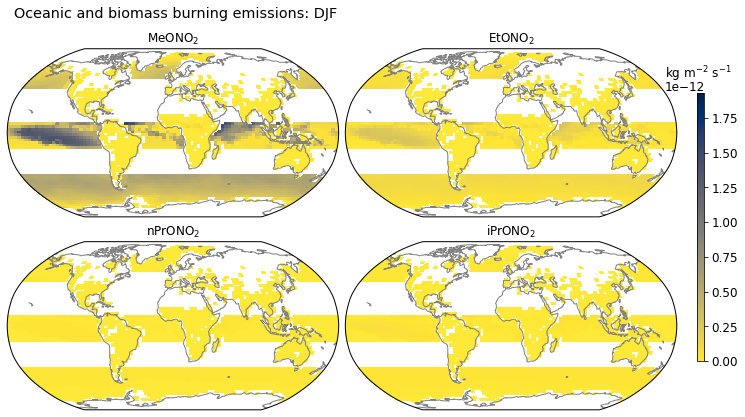

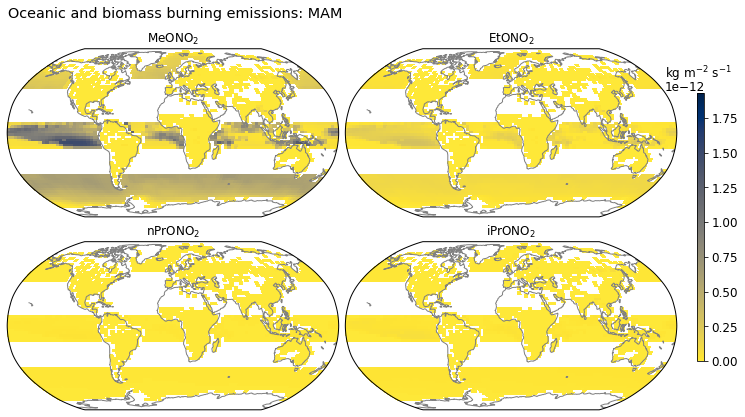

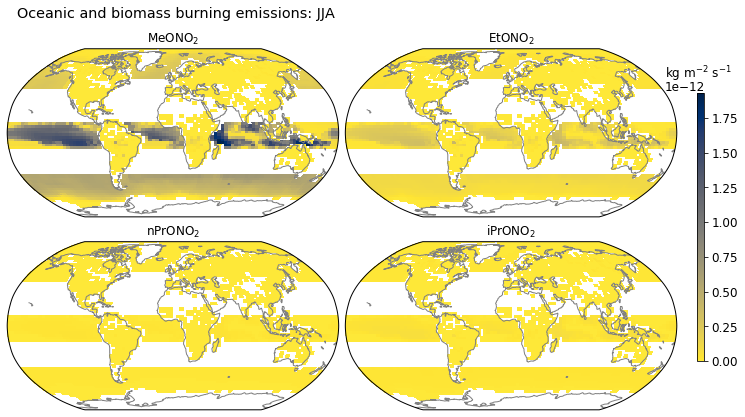

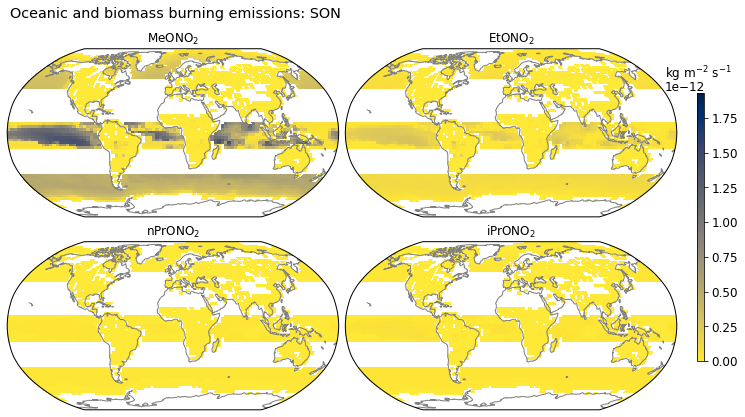

In [24]:
for issn, ssn in enumerate(['DJF', 'MAM', 'JJA', 'SON']):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0)))
    # Hide zero emissions
    cmap_hide = copy(plt.cm.cividis_r)
    cmap_hide.set_bad('w', 0)
    p00 = ax[0,0].pcolormesh(lons, lats, mskd_meono2_ssn[issn,...], transform=ccrs.PlateCarree(), vmin=0, vmax=ssn_max, cmap=cmap_hide);
    ax[0,1].pcolormesh(lons, lats, mskd_etono2_ssn[issn,...], transform=ccrs.PlateCarree(), vmin=0, vmax=ssn_max, cmap=cmap_hide);
    ax[1,0].pcolormesh(lons, lats, mskd_nprono2_ssn[issn,...], transform=ccrs.PlateCarree(), vmin=0, vmax=ssn_max, cmap=cmap_hide);
    ax[1,1].pcolormesh(lons, lats, mskd_iprono2_ssn[issn,...], transform=ccrs.PlateCarree(), vmin=0, vmax=ssn_max, cmap=cmap_hide);
    # common
    ax[0,0].set_title('$MeONO_2$')
    ax[0,1].set_title('$EtONO_2$')
    ax[1,0].set_title('$nPrONO_2$')
    ax[1,1].set_title('$iPrONO_2$')
    for iax in ax.flatten(): iax.coastlines(color='grey') 
    cax = fig.add_axes([0.923, 0.35, 0.009, 0.31])
    cb00 = fig.colorbar(p00, cax=cax, orientation='vertical')
    cb00.ax.set_title('kg $m^{-2}$ $s^{-1}$  ', pad=15);
    fig.suptitle(f'Oceanic and biomass burning emissions: {ssn}', x=0.32, y=0.76)#, weight='bold')
    fig.subplots_adjust(hspace=-0.58, wspace=0.02)
    fig.savefig(path_to_figs / f'rono2_oc_bb_emis_ssn_{issn+1}.png', bbox_inches='tight', dpi=300)

In [25]:
# Monthly
meono2_mon = cartopy.util.add_cyclic_point(meono2.data)
etono2_mon = cartopy.util.add_cyclic_point(etono2.data)
nprono2_mon = cartopy.util.add_cyclic_point(nprono2.data)
iprono2_mon = cartopy.util.add_cyclic_point(iprono2.data)
# Mask zero emissions
mskd_meono2_mon = np.ma.masked_where(meono2_mon.data<=0.00000000e+00, meono2_mon.data)
mskd_etono2_mon = np.ma.masked_where(etono2_mon.data<=0.00000000e+00, etono2_mon.data)
mskd_nprono2_mon = np.ma.masked_where(nprono2_mon.data<=0.00000000e+00, nprono2_mon.data)
mskd_iprono2_mon = np.ma.masked_where(iprono2_mon.data<=0.00000000e+00, iprono2_mon.data)
# Find max monthly emission
mon_max = max(meono2_mon.max(), etono2_mon.max(), nprono2_mon.max(), iprono2_mon.max())

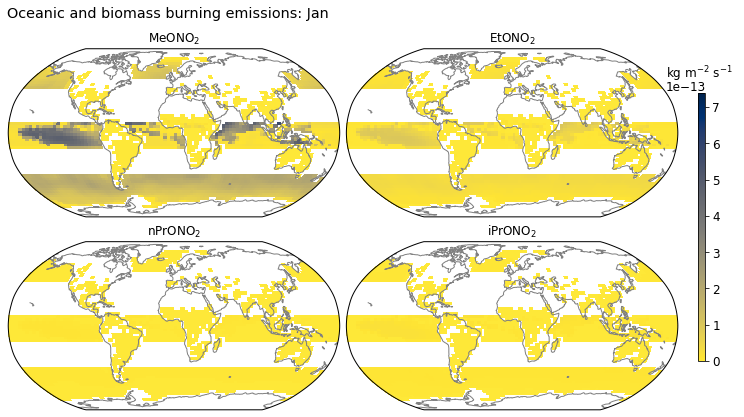

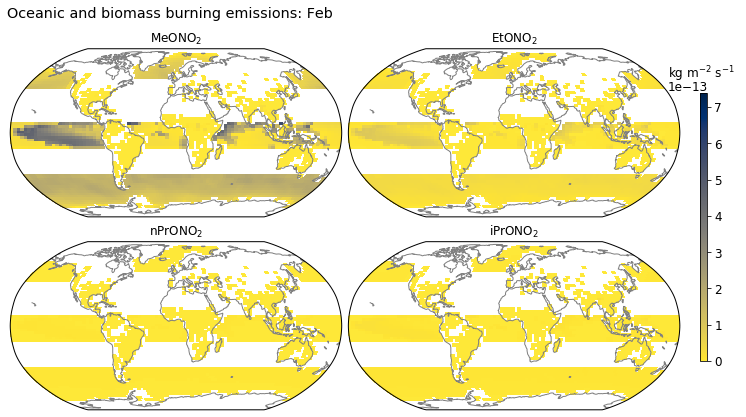

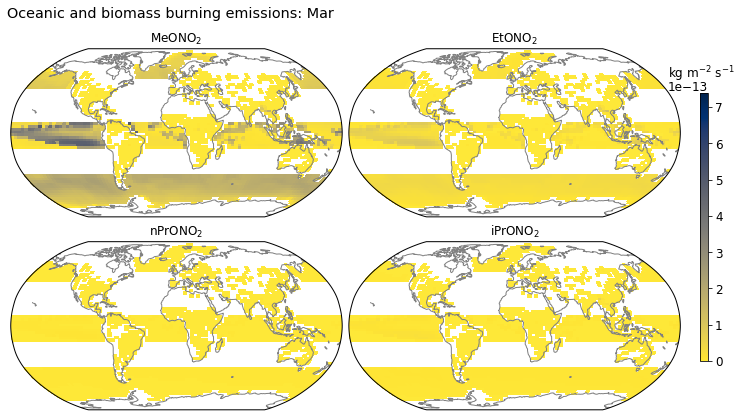

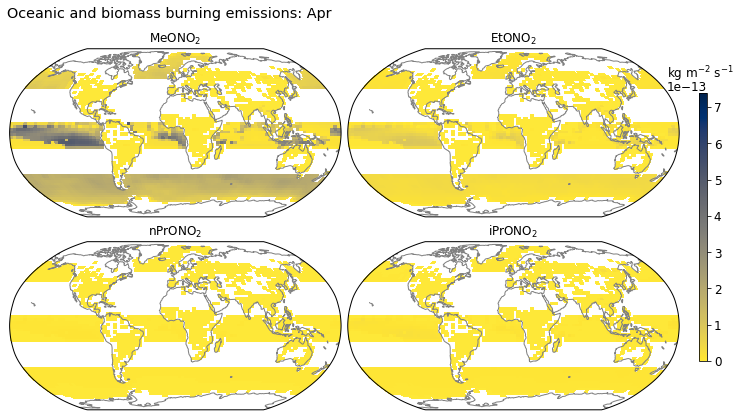

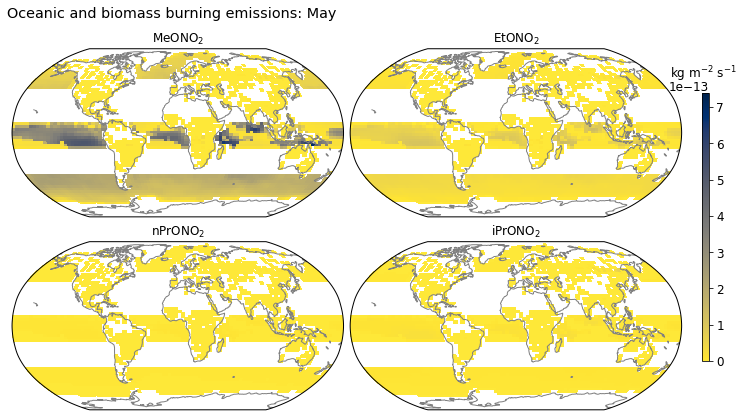

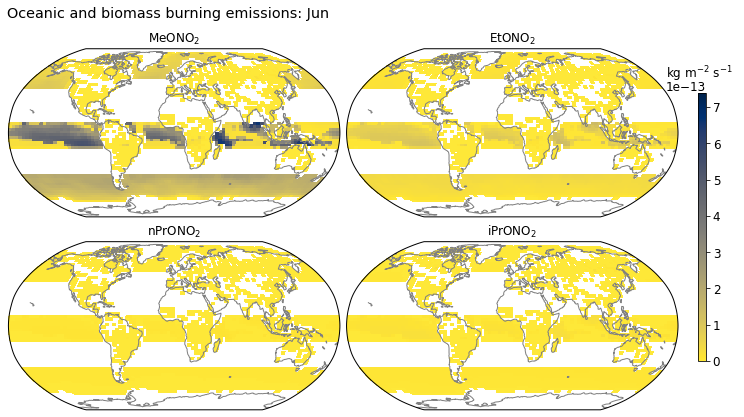

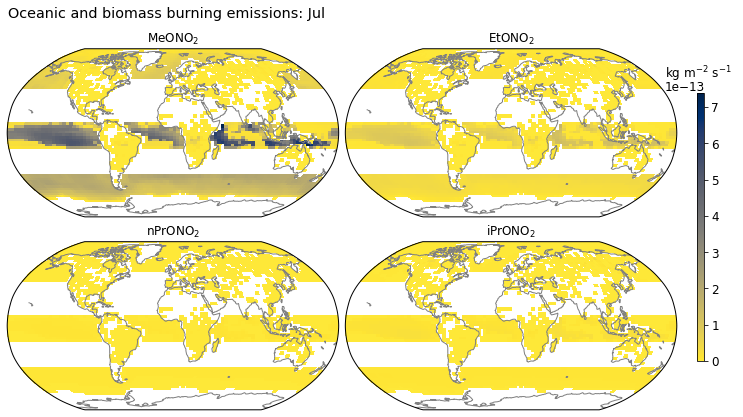

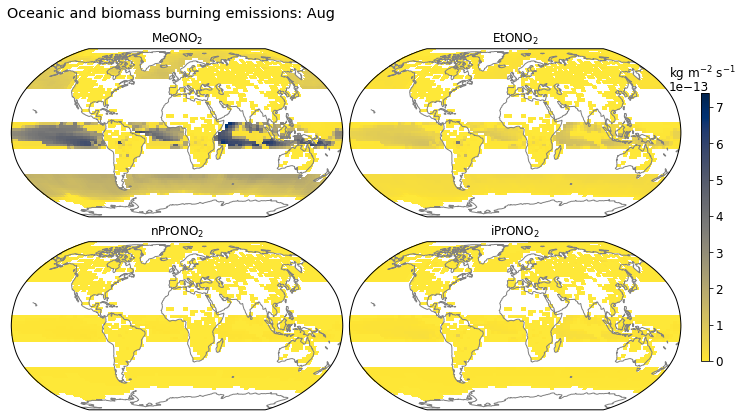

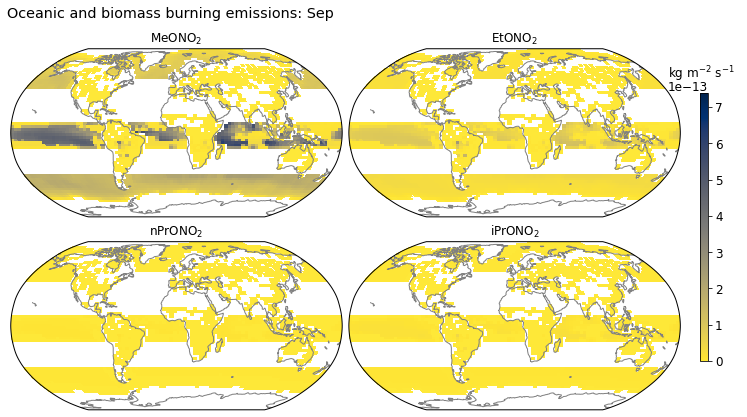

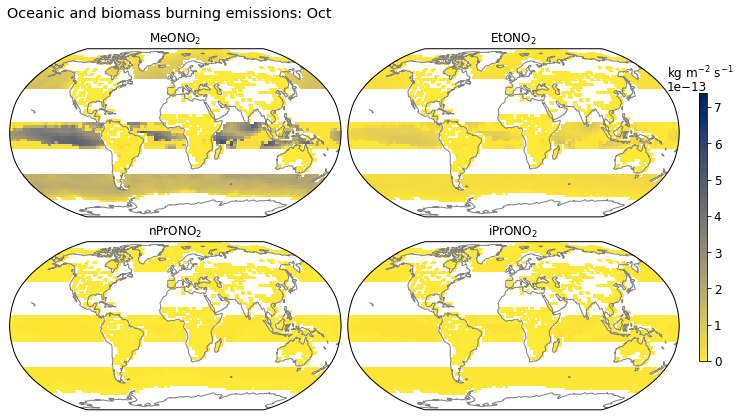

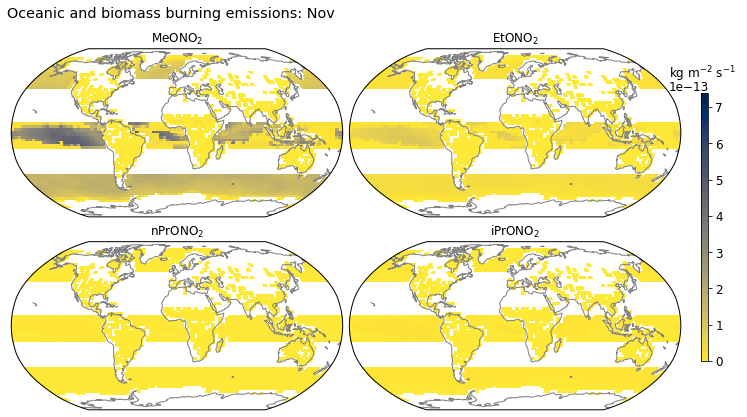

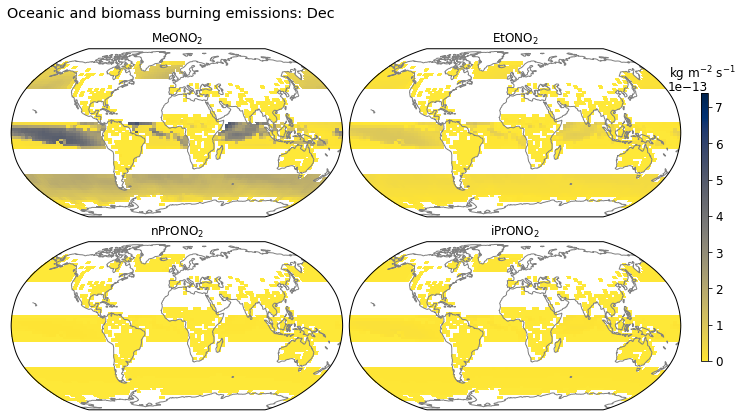

In [26]:
for imn, mn in enumerate([calendar.month_abbr[i] for i in range(13)][1:]):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0)))
    # Hide zero emissions
    cmap_hide = copy(plt.cm.cividis_r)
    cmap_hide.set_bad('w', 0)
    p00 = ax[0,0].pcolormesh(lons, lats, mskd_meono2_mon[imn,...], transform=ccrs.PlateCarree(), vmin=0, vmax=mon_max, cmap=cmap_hide);
    ax[0,1].pcolormesh(lons, lats, mskd_etono2_mon[imn,...], transform=ccrs.PlateCarree(), vmin=0, vmax=mon_max, cmap=cmap_hide);
    ax[1,0].pcolormesh(lons, lats, mskd_nprono2_mon[imn,...], transform=ccrs.PlateCarree(), vmin=0, vmax=mon_max, cmap=cmap_hide);
    ax[1,1].pcolormesh(lons, lats, mskd_iprono2_mon[imn,...], transform=ccrs.PlateCarree(), vmin=0, vmax=mon_max, cmap=cmap_hide);
    # common
    ax[0,0].set_title('$MeONO_2$')
    ax[0,1].set_title('$EtONO_2$')
    ax[1,0].set_title('$nPrONO_2$')
    ax[1,1].set_title('$iPrONO_2$')
    for iax in ax.flatten(): iax.coastlines(color='grey') 
    cax = fig.add_axes([0.923, 0.35, 0.009, 0.31])
    cb00 = fig.colorbar(p00, cax=cax, orientation='vertical')
    cb00.ax.set_title('kg $m^{-2}$ $s^{-1}$  ', pad=15);
    fig.suptitle(f'Oceanic and biomass burning emissions: {mn}', x=0.31, y=0.76)#, weight='bold')
    fig.subplots_adjust(hspace=-0.58, wspace=0.02)
    fig.savefig(path_to_figs / f'rono2_oc_bb_emis_mon_{imn+1}.png', bbox_inches='tight', dpi=300)